In [62]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
pd.set_option('display.float_format', lambda x: '%.5f' % x)



## Exercise 1a)

In [63]:
data = pd.read_csv("../data/it_salary_2020.csv",delimiter=";")
data.describe()

#data["Yearly brutto salary (without bonus and stocks) in EUR"].describe()


,Age,Total years of experience,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
count,1225.00000,1232.00000,1252.00000,822.00000,884.00000,612.00000,1172.00000,373.00000,414.00000
mean,32.51020,9.43263,80347405.81869,6111625.76521,632906.78394,103195.22386,28.63055,14.77748,771.51208
std,5.66610,12.36017,2826188974.48272,174394153.78297,16814583.45222,2020536.40585,14.77387,30.52007,6181.64977
min,20.00000,0.00000,10001.00000,0.00000,11000.00000,0.00000,0.00000,0.00000,0.00000
25%,29.00000,5.00000,59000.00000,0.00000,55000.00000,0.00000,27.00000,0.00000,0.00000
50%,32.00000,8.00000,70000.00000,5000.00000,65000.00000,5000.00000,28.00000,0.00000,250.00000
75%,35.00000,12.00000,80000.00000,20000.00000,75000.00000,36675.00000,30.00000,30.00000,600.00000
max,69.00000,383.00000,99999999999.00000,5000000000.00000,500000000.00000,50000000.00000,375.00000,375.00000,125029.00000


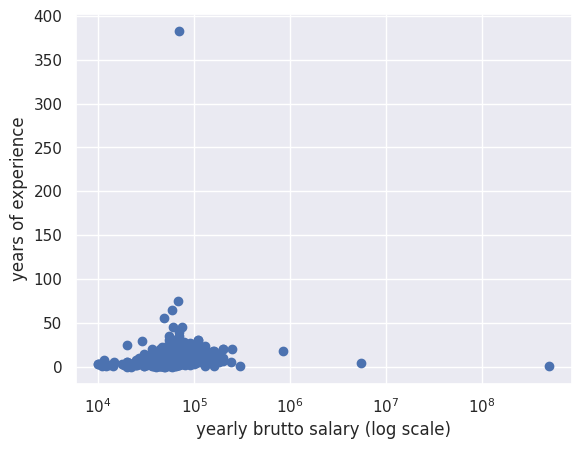

In [64]:
fig, ax = plt.subplots()
ax.scatter( data["Yearly brutto salary (without bonus and stocks) in EUR"],data["Total years of experience"])
ax.set_ylabel("years of experience" )
ax.set_xlabel("yearly brutto salary (log scale)")
ax.set_xscale("log")
plt.show()

Clearly, we need to remove outliers before checking for covariance:

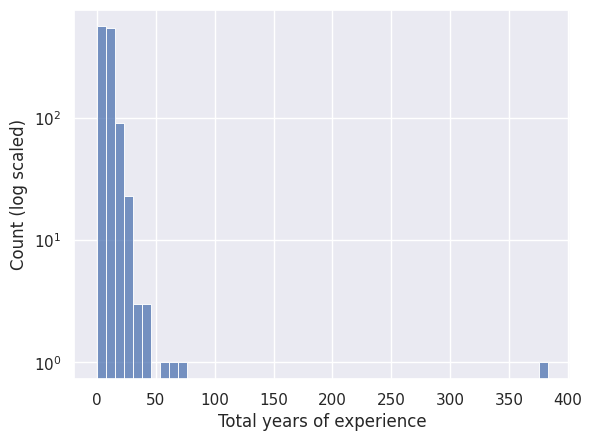

In [65]:
fig, ax = plt.subplots()
sns.histplot(data["Total years of experience"],bins=50,ax=ax)
ax.set_yscale("log")
ax.set_ylabel("Count (log scaled)") # for better visibility of outliers
plt.show()

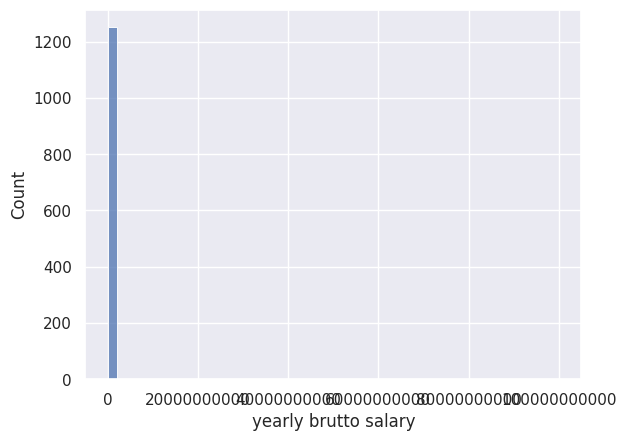

In [66]:
fig, ax = plt.subplots()
sns.histplot(data["Yearly brutto salary (without bonus and stocks) in EUR"],bins=50,ax=ax)
#ax.set_yscale("log")
ax.set_ylabel("Count")
ax.set_xlabel("yearly brutto salary")
ax.ticklabel_format(style="plain", axis='x')
plt.show()

Since both dataframes are **not** a normal distribution, we are going to use *IQR* to detect outliers and remove them:

In [67]:
def filter_iqr(my_data, multiplier = 1.5): #filters out any data outside the IQR
    q1 = my_data.quantile(0.25)
    q3 = my_data.quantile(0.75)
    iqr = q3 -q1
    mask = (my_data < (q1 - multiplier *iqr)) | (my_data > (q3 + multiplier *iqr)) # ~ inverts mask so we get everything inside the IQR
    df = my_data.mask(mask) # replace false masked values with nan
    df.dropna()
    return df

data["Total years of experience"] = filter_iqr(data["Total years of experience"])
data["Yearly brutto salary (without bonus and stocks) in EUR"] = filter_iqr(data["Yearly brutto salary (without bonus and stocks) in EUR"])


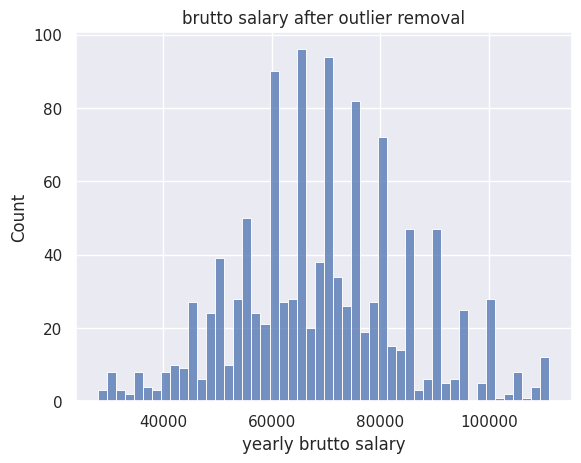

In [68]:
fig, ax = plt.subplots()
sns.histplot(data["Yearly brutto salary (without bonus and stocks) in EUR"],bins=50,ax=ax)
#ax.set_yscale("log")
ax.set_ylabel("Count")
ax.set_xlabel("yearly brutto salary")
ax.set_title("brutto salary after outlier removal")
ax.ticklabel_format(style="plain", axis='x')
plt.show()

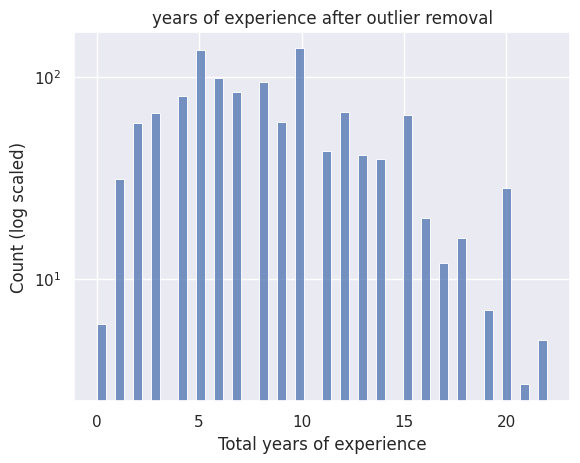

In [69]:
fig, ax = plt.subplots()
sns.histplot(data["Total years of experience"],bins=50,ax=ax)
ax.set_yscale("log")
ax.set_ylabel("Count (log scaled)") # for better visibility of outliers
ax.set_title("years of experience after outlier removal")
plt.show()

Finally, we can check the covariance matrix between *total years of experience* and *Yearly brutto salary*:

In [70]:
data["Yearly brutto salary (without bonus and stocks) in EUR"].cov(data["Total years of experience"])

29924.702346438124

since the result is positive, the two columns co-vary.